In [24]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [25]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [26]:
X_train.shape
X_test.shape

(10000, 28, 28)

7


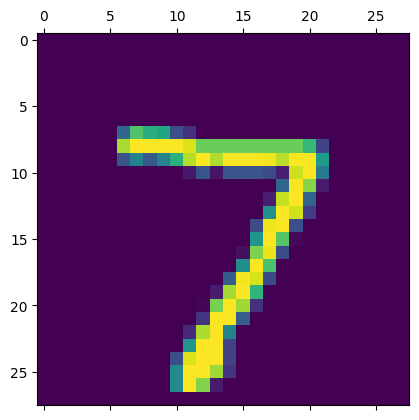

In [27]:
len(X_test[0])
plt.matshow(X_test[0])
print(y_test[0])

In [28]:
X_train_flattened=X_train.reshape(len(X_train),-1)
X_test_flattened=X_test.reshape(len(X_test),-1)

In [29]:
X_train_flattened.shape
X_test_flattened.shape

X_train_flattened=X_train_flattened/255
X_test_flattened=X_test_flattened/255



In [30]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train_flattened,y_train,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4689 - accuracy: 0.8760
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3039 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2835 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2730 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2665 - accuracy: 0.9258


In [32]:
y_predicted=model.predict(X_test_flattened)


313/313 [==============================] - 1s 3ms/step


In [33]:
y_predicted[0]

array([2.5288884e-02, 4.4146893e-07, 7.8262910e-02, 9.5269483e-01,
       1.9775624e-03, 1.3207856e-01, 1.8779471e-06, 9.9978894e-01,
       8.2537442e-02, 6.9530869e-01], dtype=float32)

In [44]:
np.argmax(y_predicted[0])
y_predicted_labels=[np.argmax(i) for i in y_predicted ]

y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [47]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

cm.shape

TensorShape([10, 10])

<Axes: >

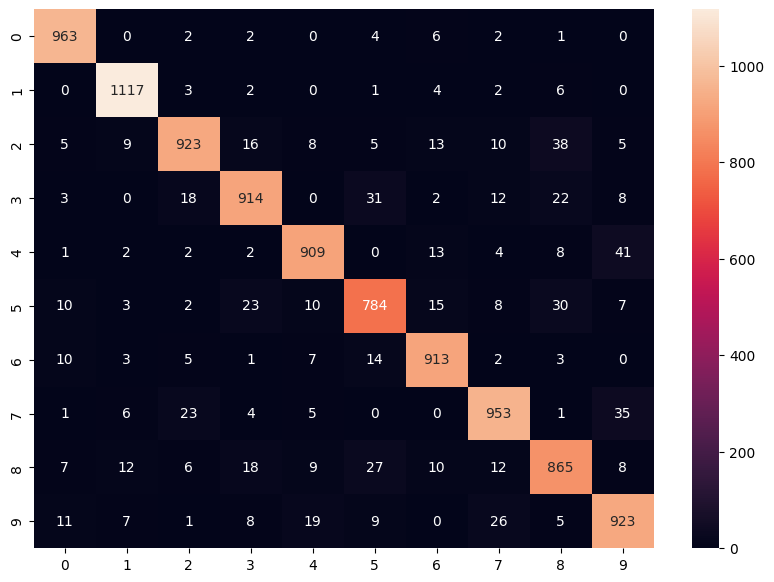

In [49]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')


In [51]:
#afer adding one hidden layer
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
    
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train_flattened,y_train,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 19s 8ms/step - loss: 0.2669 - accuracy: 0.9232
Epoch 2/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1186 - accuracy: 0.9647
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0823 - accuracy: 0.9753
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0629 - accuracy: 0.9809
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0496 - accuracy: 0.9850


In [52]:
y_predicted=model.predict(X_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted ]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

cm.shape

313/313 [==============================] - 1s 2ms/step


TensorShape([10, 10])

<Axes: >

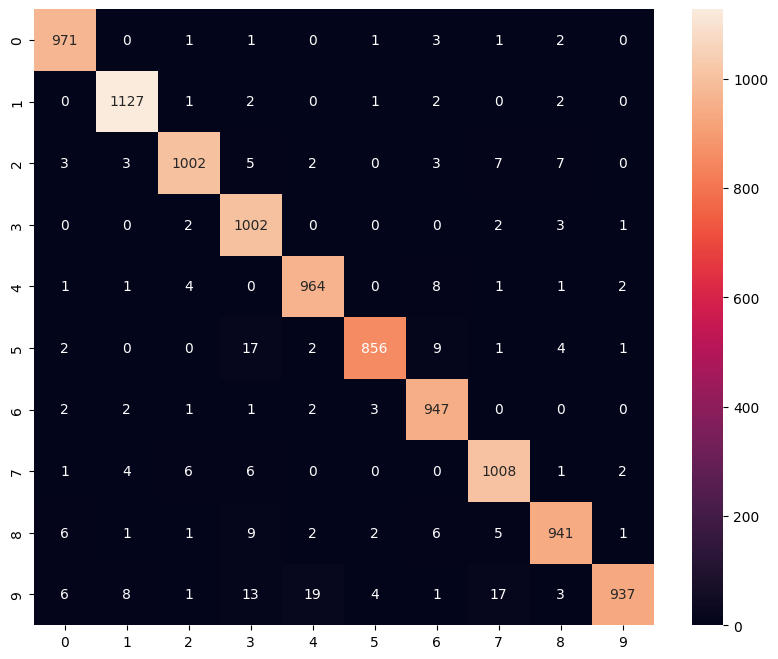

In [54]:
plt.figure(figsize=(10,8))
sn.heatmap(cm,annot=True,fmt='d')

In [ ]:
#afer adding one hidden layer 
model=keras.Sequential([
    keras.layer.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
    
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=5)
